# DSCI 552 HW1
## Yun Cheng
**USC ID: 5013-2324-78**

## Part b : Pre-Processing and Exploratory data analysis

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("./vertebral_column_data/column_2C.dat",sep="\s+") #separator whitespace
df.columns=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius','degree_spondylolisthesis','Class']


**b(i): Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1**

/Users/caroline/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


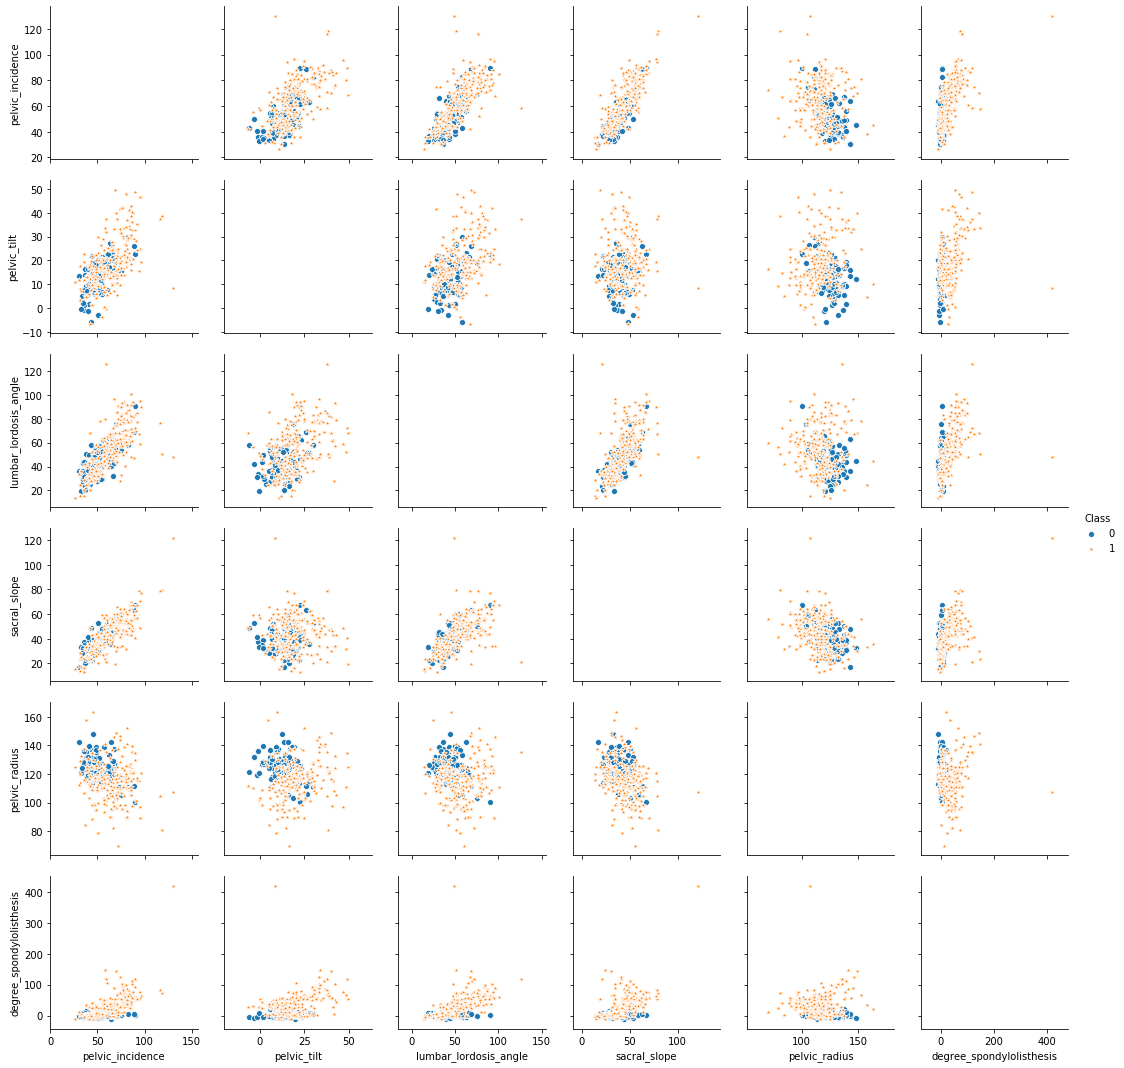

In [2]:
df_NO=df.loc[df['Class'].str.match('NO')]
df_NO.loc[:, 'Class'] = 0
df_AB=df.loc[df['Class'].str.match('AB')]
df_AB.loc[:, 'Class'] = 1
df_binary=pd.merge(df_NO, df_AB, how='outer')


g=sns.pairplot(df_binary, vars=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius','degree_spondylolisthesis'],hue='Class', markers=["o", "*"],diag_kind="kde",
    diag_kws={"linewidth": 0, "shade": False})
    



**b(ii) Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).**

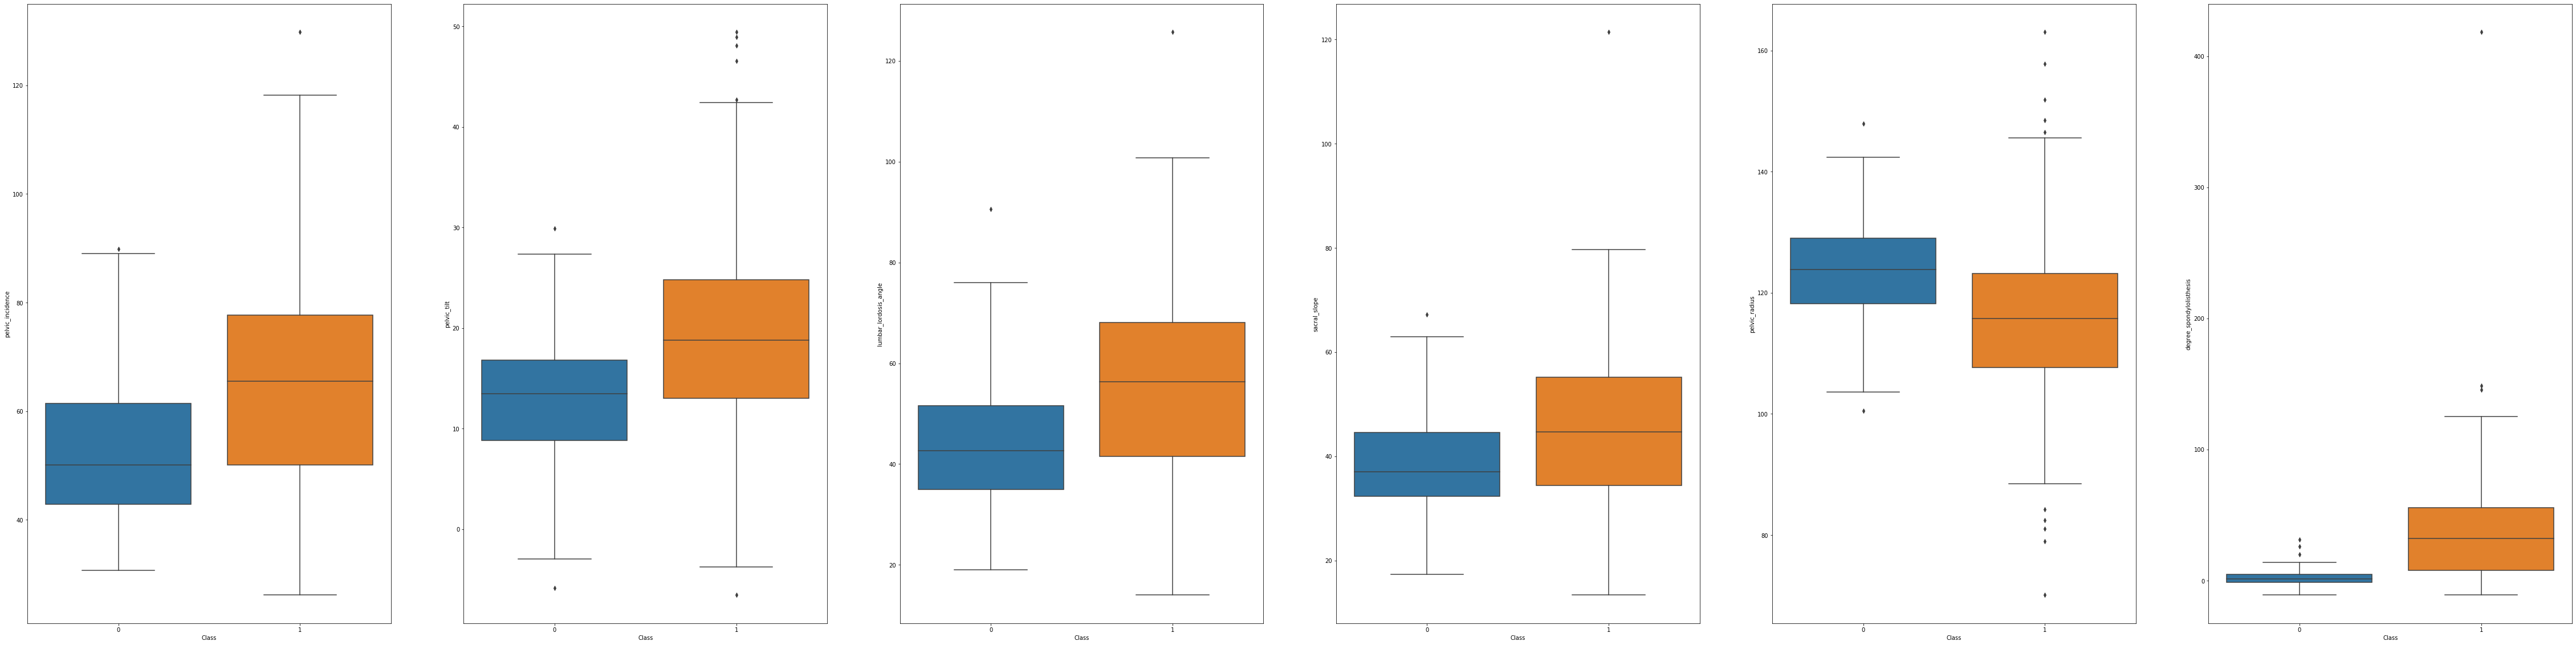

In [3]:

import matplotlib.pyplot as plt
fig,g=plt.subplots(nrows=6, ncols=1,figsize=(80,20))

plt.subplot(161)
g[0]=sns.boxplot(x="Class",y="pelvic_incidence",data=df_binary)
plt.subplot(162)
g[1]=sns.boxplot(x="Class",y="pelvic_tilt",data=df_binary)
plt.subplot(163)
g[2]=sns.boxplot(x="Class",y="lumbar_lordosis_angle",data=df_binary)
plt.subplot(164)
g[3]=sns.boxplot(x="Class",y="sacral_slope",data=df_binary)
plt.subplot(165)
g[4]=sns.boxplot(x="Class",y="pelvic_radius",data=df_binary)
plt.subplot(166)
g[5]=sns.boxplot(x="Class",y="degree_spondylolisthesis",data=df_binary)
plt.rcParams.update({'font.size': 35})


 **b (iii) Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as thetraining set and the rest of the data as the test set**
 

In [4]:

training_set=pd.merge(df_NO.iloc[0:70,:],df_AB.iloc[0:140,:],how='outer') #selec training set 

Test_set=pd.merge(df_NO.iloc[70:,:],df_AB.iloc[140:,:],how='outer')#selec test set


# Part c (i) Write code for k-nearest neighbors with Euclidean metric (or use a softwarepackage).
Two way to solve:
 * Without pacakges

 * Using packages

**Method 1: Calculate  euclidean distance without using pacakges**

In [5]:
from math import sqrt
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1): # -1 Because last column is class which would be ignored
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [6]:
# Test euclidean distance
X_train = np.array(training_set)
row0=X_train[0]
for row in X_train:
    distance = euclidean_distance(row0, row)
    #print(distance)


In [7]:
#Get K NN
def k_neighbors(data, next_row, num_neighbors):
    distances = list()
    for row in data:
        dist = euclidean_distance(next_row, row)
        distances.append((row, dist))# use () because List append only one at once
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])# pick up from distance [(array[row],distance)]
    return neighbors

In [8]:
#Test K N Neighbors
neighbors = k_neighbors(X_train, X_train[0], 3)




In [9]:
#Prediction
def predict_classification(data, next_row, num_neighbors):
    neighbors = k_neighbors(data, next_row, num_neighbors)
    result = [row[-1] for row in neighbors]
    prediction = max(set(result), key=result.count)
    return prediction

In [10]:
#Test Prediction
prediction = predict_classification(X_train, X_train[0], 5)
print('Expected Class %d, Predicted Class %d.' % (X_train[0][-1], prediction))

Expected Class 0, Predicted Class 0.


**Method 2: Using Sklearn built-in function**

In [11]:
X_T = training_set.iloc[:, :-1].values
y_T = training_set.iloc[:, -1].values

X_test=Test_set.iloc[:,:-1]
Y_test=Test_set.iloc[:,-1]


In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=208,metric='euclidean')


# Part c (ii) Test  all the data in the test database with k nearest neighbors. Take decisions by majority polling

##  Plot train and test errors in terms of k for k∈ { 208, 205, . . . ,7,4,1,} (in reverse order) and find the Best k*

In [13]:
Train_error=[]
alternative_k = np.arange(208, 0, -3)
for i in alternative_k:
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_T, y_T)
    pred_i = knn.predict(X_T)
    Train_error.append(np.mean(pred_i != y_T))

print("Minimum train error:",min(Train_error),"at K =",208-3*Train_error.index(min(Train_error)))

Minimum train error: 0.0 at K = 1


**Test eror rate:**

Minimum test error: 0.06060606060606061 at K = 4


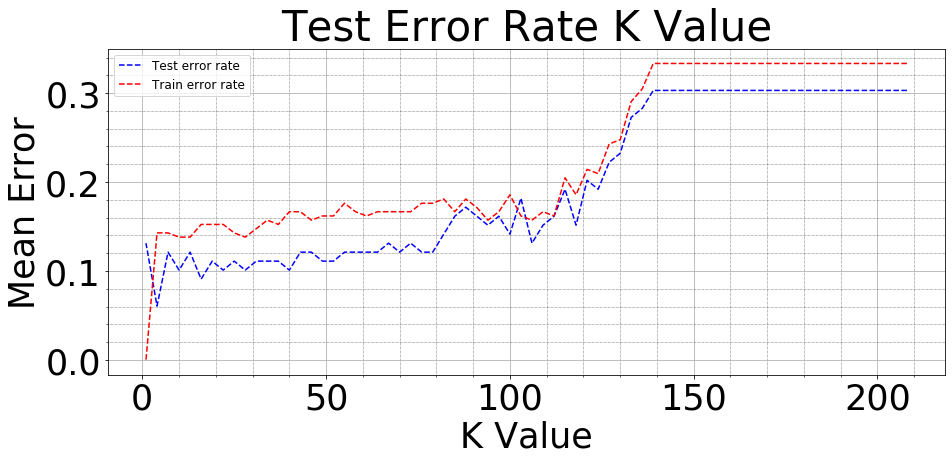

In [14]:
Test_error = []
alternative_k = np.arange(208, 0, -3)
# Calculating error for K values between 0 to 208
for i in alternative_k:
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_T, y_T)
    pred_i = knn.predict(X_test)
    Test_error.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(15, 6))
plt.plot(alternative_k, Test_error, color='blue', linestyle='dashed', 
         markerfacecolor='blue', markersize=10,label='Test error rate')
plt.plot(alternative_k, Train_error, color='red', linestyle='dashed',
         markerfacecolor='blue', markersize=10,label='Train error rate')
plt.title('Test Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid(True)
plt.minorticks_on()
plt.legend(prop={'size': 12})

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
print("Minimum test error:",min(Test_error),"at K =",208-3*Test_error.index(min(Test_error)))

## Calculate the confusion matrix, true positive rate, true negative rate, precision and F1-score when k=k*

**Confusoin matrix:**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
classifier = KNeighborsClassifier(n_neighbors=4,metric='euclidean')
classifier.fit(X_T, y_T)
y_pred = knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("**Confusion matrix is:**")
print(confusion_matrix(Y_test, y_pred))
print('**Classification report is:**')
print(classification_report(Y_test, y_pred))
print("F-1 score at k=4",f1_score(Y_test, y_pred))

**Confusion matrix is:**
[[20 10]
 [ 3 66]]
**Classification report is:**
              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.87      0.96      0.91        69

    accuracy                           0.87        99
   macro avg       0.87      0.81      0.83        99
weighted avg       0.87      0.87      0.86        99

F-1 score at k=4 0.9103448275862069


**True positive rate, True negative rate:**

In [16]:
cm=confusion_matrix(Y_test, y_pred)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
print("true_positive_rate(TPR) = ", TP/ (TP + FN))
print("true_negative_rate(TNR) = ",TN / (FP + TN))

true_positive_rate(TPR) =  0.8695652173913043
true_negative_rate(TNR) =  0.868421052631579


## Part c (iii)  Learning curve: Plot the best test error rate which is obtained by some value of k , against the size of training set, when the size of training set is N∈ {10,20,30, . . . ,210}

for each N , select your training set by choosing the first  N/ 3  rows of Class 0 and the first N −  N/ 3 rows of Class 1 in the training set you created

In [29]:
#Select set size N
alternative_N = np.arange(10, 210, 10)
Train_K_min=[]
for N in alternative_N:
    training_N_set=pd.merge(df_NO.iloc[0:N//3,:],df_AB.iloc[0:N-N//3,:],how='outer') #selec training set
    Test_N_set= pd.merge(df_NO.iloc[N//3:,:],df_AB.iloc[N-N//3:,:],how='outer')
    alternative_N_k=np.arange(1,N,5)
    X_N_Train = training_N_set.iloc[:, :-1].values
    Y_N_Train = training_N_set.iloc[:, -1].values
    X_N_Test = Test_N_set.iloc[:, :-1].values
    Y_N_Test = Test_N_set.iloc[:, -1].values
    Train_N_error=[]
    for k in alternative_N_k:
        classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
        classifier.fit(X_N_Train, Y_N_Train)
        pred_i = classifier.predict(X_N_Test)
        Train_N_error.append(np.mean(pred_i != Y_N_Test))
    Train_K_min.append((min(Train_N_error)))
x=range(10,211,10)


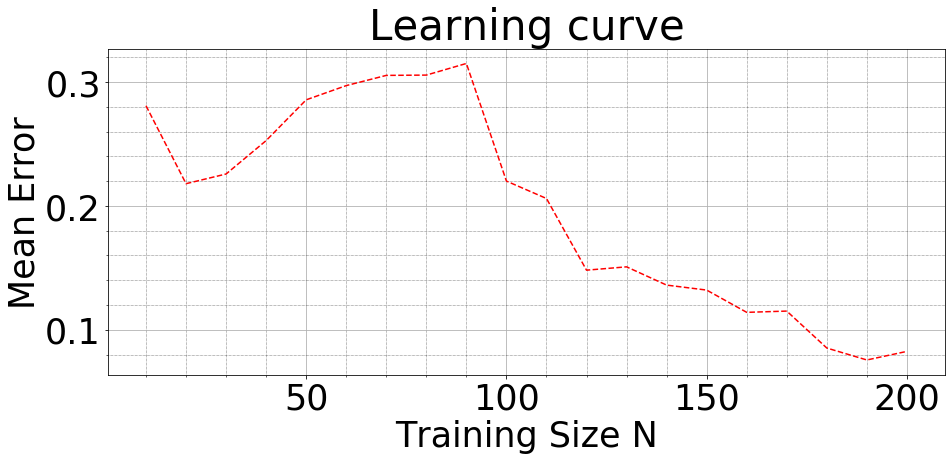

In [30]:
plt.figure(figsize=(15, 6))
plt.plot(alternative_N, Train_K_min, color='red', linestyle='dashed',
         markerfacecolor='blue', markersize=10)
plt.title('Learning curve')
plt.xlabel('Training Size N')
plt.ylabel('Mean Error')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')


## Part d :Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k=k∗) in a table. Use all of your training data and select the best k when k belongs to {1,6,11, . . . ,196}.



**(i) Minkowski Distance:**
* A.  which becomes Manhattan Distance with p= 1

Minimum error: 0.1111111111111111 at K = [6, 11, 26]


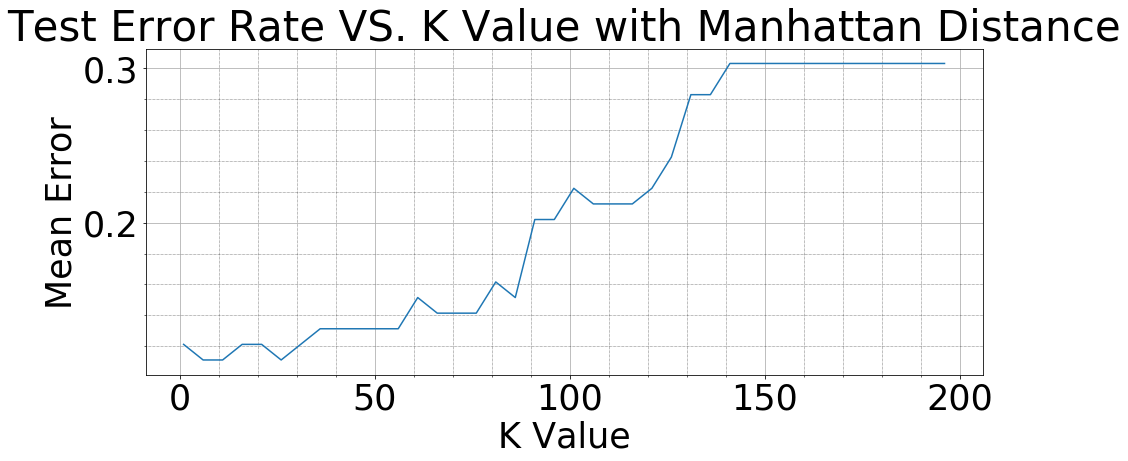

In [19]:
from sklearn.neighbors import DistanceMetric
Test_m_error=[]
alternative_k = np.arange(1, 197, 5)
for k in alternative_k:
        classifier = KNeighborsClassifier(n_neighbors=k,p=1)
        classifier.fit(X_T, y_T)
        pred_i = classifier.predict(X_test)
        Test_m_error.append(np.mean(pred_i !=Y_test))
plt.figure(figsize=(15, 6))
plt.plot(alternative_k,Test_m_error)
plt.title('Test Error Rate VS. K Value with Manhattan Distance')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#= np.where(Test_m_error==min(Test_m_error))
min_index=[i for i, x in enumerate(Test_m_error) if x==min(Test_m_error)]
real_k = [i * 5 +1 for i in min_index]
print("Minimum error:",min(Test_m_error),"at K =",real_k)


* B.  With log10(p)∈ {0.1,0.2 ,...,1}. In this case, use the k∗ you found for the Manhattan distance. What is the best log10(p)?


Minimum error: 0.1111111111111111 at  log10(p) = [0.2 0.3] where p = [1.58489319 1.99526231]


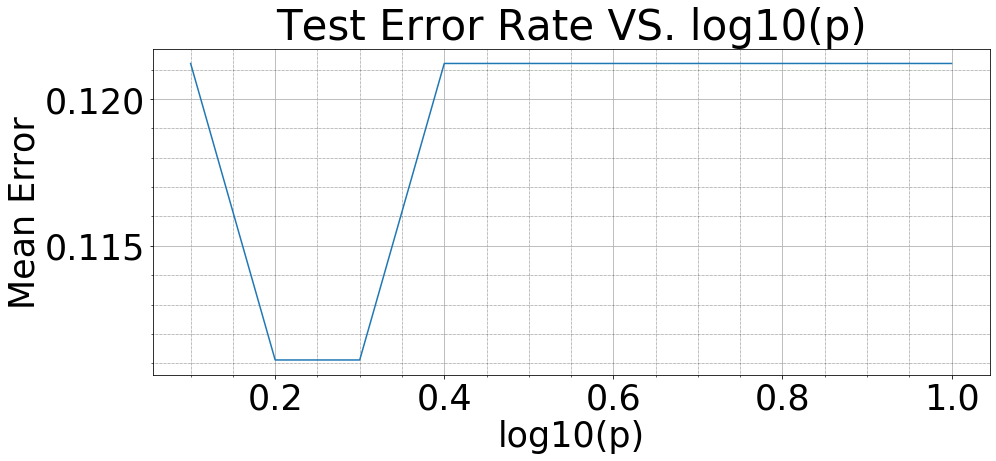

In [20]:
import math
log_p=np.arange(0.1, 1.1, 0.1)
p=10**log_p
Test_p_error=[]
for pi in p:
        classifier = KNeighborsClassifier(n_neighbors=31,p=pi)# choose best k* is 31
        classifier.fit(X_T, y_T)
        pred_i = classifier.predict(X_test)
        Test_p_error.append(np.mean(pred_i !=Y_test))
plt.figure(figsize=(15, 6))
plt.plot(log_p,Test_p_error)
plt.title('Test Error Rate VS. log10(p)')
plt.xlabel('log10(p)')
plt.ylabel('Mean Error')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
min_index=[i for i, x in enumerate(Test_p_error) if x==min(Test_p_error)]
#index=Test_p_error.index(min(Test_p_error))# get minimum error index

print("Minimum error:",min(Test_p_error),"at  log10(p) =",log_p[min_index],"where p =",10**log_p[min_index])



* C.  which becomes Chebyshev Distance when p apporaching to infinite

Minimum error: 0.08080808080808081 at K = 16


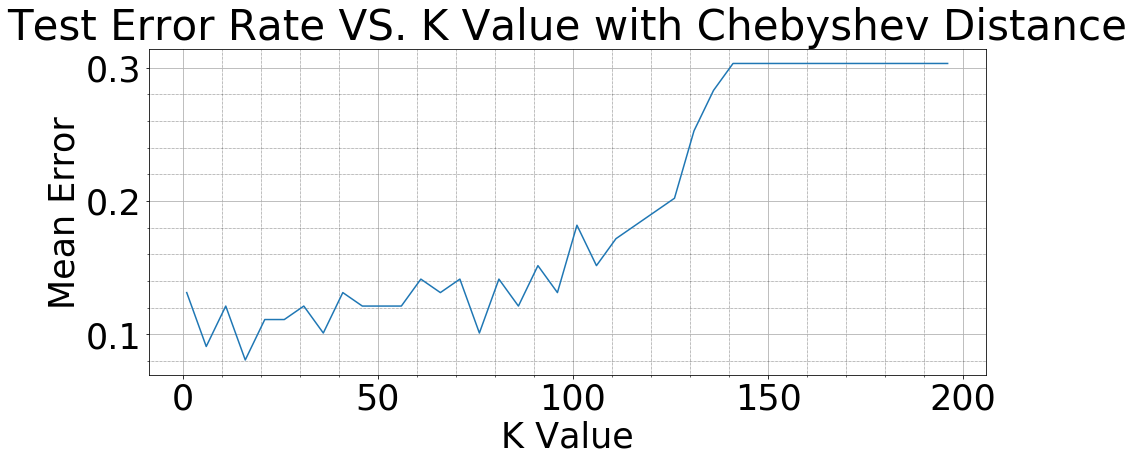

In [21]:
alternative_k = np.arange(1, 197, 5)

Train_c_error=[]
for k in alternative_k:
        classifier = KNeighborsClassifier(n_neighbors=k,p=float('INF'))
        classifier.fit(X_T, y_T)
        pred_i = classifier.predict(X_test)
        Train_c_error.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(15, 6))
plt.plot(alternative_k,Train_c_error)
plt.title('Test Error Rate VS. K Value with Chebyshev Distance')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
print("Minimum error:",min(Train_c_error),"at K =",5*Train_c_error.index(min(Train_c_error))+1)

**(ii) Mahalanobis Distance**

Minimum error: 0.1111111111111111 at K = 6


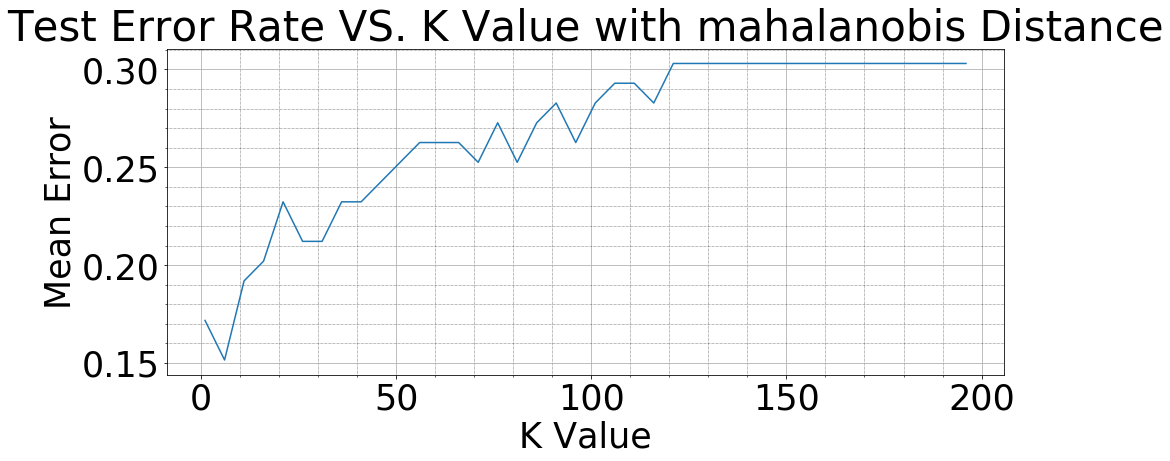

In [22]:
Test_Ma_error=[]
alternative_k = np.arange(1, 197, 5)
for k in alternative_k:
        classifier = KNeighborsClassifier(n_neighbors=k,metric='mahalanobis',metric_params={'V': np.cov(X_T)}, algorithm="brute")
        classifier.fit(X_T, y_T)
        pred_i = classifier.predict(X_test)
        Test_Ma_error.append(np.mean(pred_i !=Y_test))
plt.figure(figsize=(15, 6))
plt.plot(alternative_k,Test_Ma_error)
plt.title('Test Error Rate VS. K Value with mahalanobis Distance')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
print("Minimum error:",min(Test_m_error),"at K =",Test_Ma_error.index(min(Test_Ma_error))*5+1)

**Summary Table for Uniform Weights:**

In [23]:
tb={"Distance Type":["Manhattan (p=1)","Chebyshev (p=INF)","Mahalanobis"],
    "Minimum error":[min(Test_m_error),min(Train_c_error),min(Test_m_error)],
    "Best k":[real_k,
              5*Train_c_error.index(min(Train_c_error))+1,
              Test_Ma_error.index(min(Test_Ma_error))*5+1]
   }
table=pd.DataFrame(data=tb)
print(table)

       Distance Type  Minimum error       Best k
0    Manhattan (p=1)       0.111111  [6, 11, 26]
1  Chebyshev (p=INF)       0.080808           16
2        Mahalanobis       0.111111            6


## Part e: The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k belongs to {1,6,11, . . . ,196}

**Euclidean:**

Minimum error: 0.10101010101010101 at K = 6


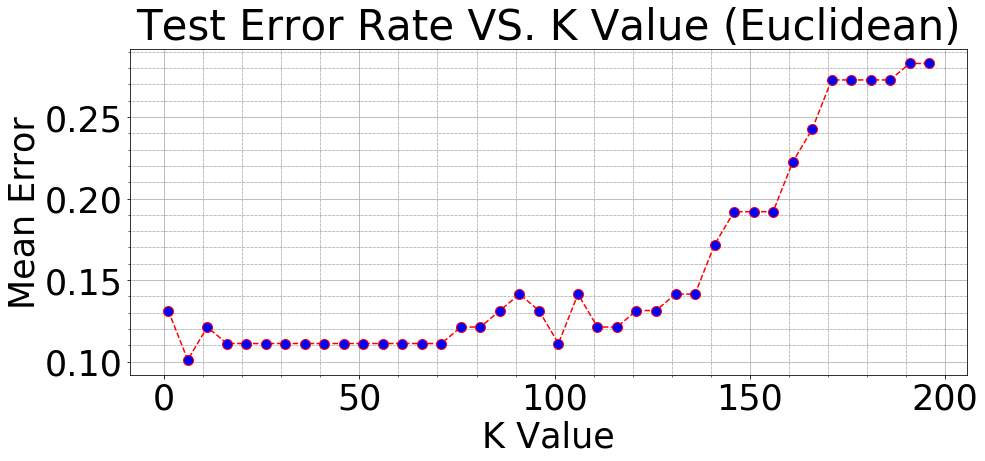

In [24]:
Test_e_voting_error = []
alternative_k = np.arange(1, 197, 5)
# Calculating error for K values between 0 to 208
for i in alternative_k:
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean',weights='distance')
    knn.fit(X_T, y_T)
    pred_i = knn.predict(X_test)
    Test_e_voting_error.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(15, 6))
plt.plot(alternative_k, Test_e_voting_error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Test Error Rate VS. K Value (Euclidean)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
print("Minimum error:",min(Test_e_voting_error),"at K =",Test_e_voting_error.index(min(Test_e_voting_error))*5+1)

Minimum error: 0.10101010101010101 at K = [6, 11]


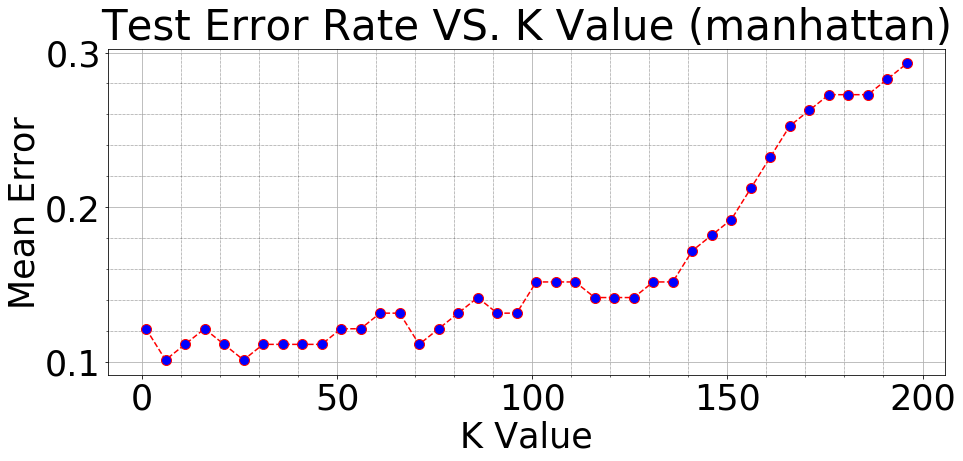

In [25]:
Test_m_voting_error = []
alternative_k = np.arange(1, 197, 5)
# Calculating error for K values between 0 to 208
for i in alternative_k:
    knn = KNeighborsClassifier(n_neighbors=i,metric='manhattan',weights='distance')
    knn.fit(X_T, y_T)
    pred_i = knn.predict(X_test)
    Test_m_voting_error.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(15, 6))
plt.plot(alternative_k, Test_m_voting_error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Test Error Rate VS. K Value (manhattan)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
min_index_m_voting=[i for i, x in enumerate(Test_m_voting_error) if x==min(Test_m_voting_error)]
real_k_m_voting = [i * 5 +1 for i in min_index]
print("Minimum error:",min(Test_m_voting_error),"at K =",real_k_m_voting)

Minimum error: 0.1111111111111111 at K = 16


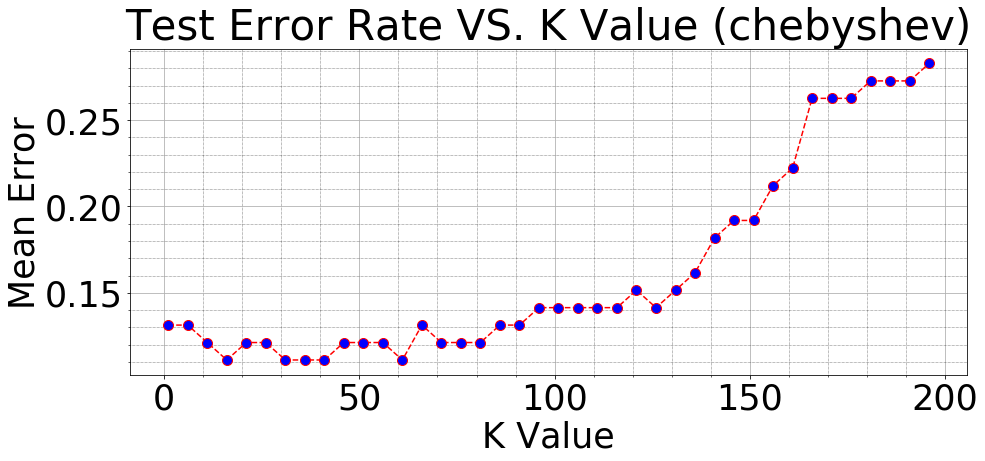

In [26]:
Test_c_voting_error = []
alternative_k = np.arange(1, 197, 5)
# Calculating error for K values between 0 to 208
for i in alternative_k:
    knn = KNeighborsClassifier(n_neighbors=i,metric='chebyshev',weights='distance')
    knn.fit(X_T, y_T)
    pred_i = knn.predict(X_test)
    Test_c_voting_error.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(15, 6))
plt.plot(alternative_k, Test_c_voting_error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Test Error Rate VS. K Value (chebyshev)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

print("Minimum error:",min(Test_c_voting_error),"at K =",Test_c_voting_error.index(min(Test_c_voting_error))*5+1)

**Summary Table for weighted voting:**

In [27]:
tb1={"Distance Type":["Euclidean","manhattan","chebyshev"],
    "Minimum error":[min(Test_m_error),min(Train_c_error),min(Test_m_error)],
    "Best k":[Test_e_voting_error.index(min(Test_e_voting_error))*5+1,
              real_k_m_voting,
              Test_c_voting_error.index(min(Test_c_voting_error))*5+1]
   }
table1=pd.DataFrame(data=tb1)
print(table1)

  Distance Type  Minimum error   Best k
0     Euclidean       0.111111        6
1     manhattan       0.080808  [6, 11]
2     chebyshev       0.111111       16


# Part f: What is the lowest training error rate you achieved in this homework

The lowest training error rate I can achieved is 0